# Hypothesis Testing Demonstration

In [0]:
import pandas as pd
import numpy as np

Our dataset comes from Kaggle and contains information about the student, including their identity, education level, and test scores. Let's load it in using pandas and display the first couple of rows. 

In [10]:
scores = pd.read_csv("StudentsPerformance.csv")
scores.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The test statistic we will use is the observed difference between the means of reading scores between test takers and non-test takers. (for more context and p-value interepretation, refer to notebook from last week's general member lecture)

## Bootstrapping and Confidence Intervals

We now should compute a confidence interval in order to provide an interval of estimates for our population parameter. We want to estimate the differences of means of the reading scores for those who did and didn't do test preparation.

We may use the bootstrap sampling distribution to create a confidence interval which we use to estimate the value of the population parameter. We treat our original data as the bootstrap population to perform the bootstrap procedure:

1) Draw a sample with replacement from the test prep students and calculate the mean reading score for these students. We also draw a sample with replacement from the non-test prep students and calculate the mean reading score.

2) Calculate the difference in means.

3) Repeat the above process 10000 times, obtaining 10000 mean differences.

This procedure gives us a empirical sampling distribution of differences in mean reading scores.

In [0]:
def resample(sample):
    return np.random.choice(sample, size=len(sample))

def bootstrap(sample, stat, replicates):
    return np.array([
        stat(resample(sample)) for _ in range(replicates)
    ])

In [0]:
completed_scores = scores[scores['test preparation course'] == 'completed']['reading score']
not_completed_scores = scores[scores['test preparation course'] == 'none']['reading score']

completed_means = bootstrap(completed_scores, np.mean, 10000)
non_completed_means = bootstrap(not_completed_scores, np.mean, 10000)

bootstrap_differences = completed_means - non_completed_means



Here's a histogram of the empirical distribution of the difference in means:

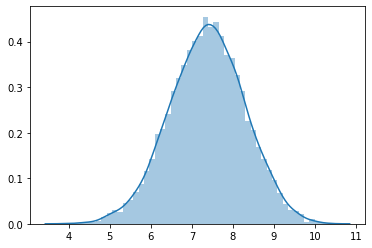

In [13]:
sns.distplot(bootstrap_differences)

In [14]:
# Construct 95% confidence interval from bootstrapping
(np.percentile(bootstrap_differences, 2.5), 
 np.percentile(bootstrap_differences, 97.5))

(5.539214700917181, 9.124600584764789)

This confidence interval allows us to state with 95% confidence that the population mean difference in reading scores is between 5.54 and 9.11.

And that concludes our introductory workshop on hypothesis testing! Hope you find this useful in your projects and in the near future! Happy coding :)